In [1]:
import pandas as pd
import json
import os

# List of Excel files
file_names = [
    "bajra.xlsx", "barley.xlsx", "black gram.xlsx", "chilli red.xlsx", "copra.xlsx", 
    "gram_raw.xlsx", "green gram.xlsx", "groundnut.xlsx", "jowar.xlsx", "lentil.xlsx", 
    "maize.xlsx", "mustard.xlsx", "niger seed.xlsx", "onion.xlsx", "paddy.xlsx", 
    "pegeonn pea.xlsx", "potato.xlsx", "ragi.xlsx", "safflower.xlsx", "sesamum.xlsx", 
    "soyabean.xlsx", "sugarcane.xlsx", "sunflower.xlsx", "tomato.xlsx", "wheat1.xlsx"
]

# Loop through each Excel file
for file_name in file_names:
    # Load the Excel file
    df = pd.read_excel(file_name)
    
    # Group market names by their associated districts
    grouped_markets = df.groupby("District Name")["Market Name"].unique().apply(list).to_dict()
    
    # Convert the result into JSON format
    grouped_markets_json = json.dumps(grouped_markets, indent=4)
    
    # Create output path for each file with the same name but .json extension
    output_path = f"{os.path.splitext(file_name)[0]}.json"
    
    # Save to a file
    with open(output_path, "w") as json_file:
        json_file.write(grouped_markets_json)
    
    print(f"Grouped market names for {file_name} have been saved to {output_path}.")


Grouped market names for bajra.xlsx have been saved to bajra.json.
Grouped market names for barley.xlsx have been saved to barley.json.
Grouped market names for black gram.xlsx have been saved to black gram.json.
Grouped market names for chilli red.xlsx have been saved to chilli red.json.
Grouped market names for copra.xlsx have been saved to copra.json.
Grouped market names for gram_raw.xlsx have been saved to gram_raw.json.
Grouped market names for green gram.xlsx have been saved to green gram.json.


KeyboardInterrupt: 

In [4]:
import pandas as pd
import json
import os

# List of Excel files
file_names = [
    "bajra.xlsx", "barley.xlsx", "black gram.xlsx", "chilli red.xlsx", "copra.xlsx", 
    "gram_raw.xlsx", "green gram.xlsx", "groundnut.xlsx", "jowar.xlsx", "lentil.xlsx", 
    "maize.xlsx", "mustard.xlsx", "niger seed.xlsx", "onion.xlsx", "paddy.xlsx", 
    "pegeonn pea.xlsx", "potato.xlsx", "ragi.xlsx", "safflower.xlsx", "sesamum.xlsx", 
    "soyabean.xlsx", "sugarcane.xlsx", "sunflower.xlsx", "tomato.xlsx", "wheat1.xlsx"
]

# Loop through each Excel file
for file_name in file_names:
    # Load the Excel file
    df = pd.read_excel(file_name)
    
    # Calculate the average of 'Modal Price (Rs./Quintal)' column
    if 'Modal Price (Rs./Quintal)' in df.columns:
        avg_price = df['Modal Price (Rs./Quintal)'].mean()
    else:
        avg_price = None
    
    # Print the average price for the current file
    if avg_price is not None:
        print(f"Average Modal Price (Rs./Quintal) for {file_name}: {avg_price}")
    else:
        print(f"'Modal Price (Rs./Quintal)' column not found in {file_name}.")


Average Modal Price (Rs./Quintal) for bajra.xlsx: 2307.8679454174307
Average Modal Price (Rs./Quintal) for barley.xlsx: 2063.6634083286754
Average Modal Price (Rs./Quintal) for black gram.xlsx: 7702.365299499749
Average Modal Price (Rs./Quintal) for chilli red.xlsx: 16522.710944793176
Average Modal Price (Rs./Quintal) for copra.xlsx: 8574.951336302895
Average Modal Price (Rs./Quintal) for gram_raw.xlsx: 4097.871126760563
Average Modal Price (Rs./Quintal) for green gram.xlsx: 7738.501743679163
Average Modal Price (Rs./Quintal) for groundnut.xlsx: 6149.014485831848
Average Modal Price (Rs./Quintal) for jowar.xlsx: 3184.501692304574
Average Modal Price (Rs./Quintal) for lentil.xlsx: 6209.335554026615
Average Modal Price (Rs./Quintal) for maize.xlsx: 2149.2996829091694
Average Modal Price (Rs./Quintal) for mustard.xlsx: 5295.711422435417
Average Modal Price (Rs./Quintal) for niger seed.xlsx: 7705.034985422741
Average Modal Price (Rs./Quintal) for onion.xlsx: 2936.883951669156
Average Modal

In [12]:
df = pd.read_excel('bajra.xlsx')
df.columns

Index(['Sl no.', 'District Name', 'Market Name', 'Commodity', 'Variety',
       'Grade', 'Min Price (Rs./Quintal)', 'Max Price (Rs./Quintal)',
       'Modal Price (Rs./Quintal)', 'Price Date'],
      dtype='object')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import pickle
import json


In [3]:

# Load the dataset
df = pd.read_excel('bajra.xlsx')


In [5]:

# Data Cleaning
# Standardize column names
df.columns = [col.strip().replace(' ', '_') for col in df.columns]


In [10]:
print(df.columns)


Index(['Min_Price_(Rs./Quintal)', 'Max_Price_(Rs./Quintal)',
       'District_Name_Ahmedabad', 'District_Name_Ahmednagar',
       'District_Name_Ajmer', 'District_Name_Akola', 'District_Name_Aligarh',
       'District_Name_Alirajpur', 'District_Name_Alwar',
       'District_Name_Amarawati',
       ...
       'Market_Name_Yalburga', 'Market_Name_Yawal', 'Market_Name_Yeola',
       'Market_Name_Yusufpur', 'Market_Name_Zaheerabad',
       'Market_Name_Zalod(Sanjeli)', 'Market_Name_Zalod(Zalod)', 'Year',
       'Month', 'Day'],
      dtype='object', length=780)


In [11]:
df

,Min_Price_(Rs./Quintal),Max_Price_(Rs./Quintal),District_Name_Ahmedabad,District_Name_Ahmednagar,District_Name_Ajmer,District_Name_Akola,District_Name_Aligarh,District_Name_Alirajpur,District_Name_Alwar,District_Name_Amarawati,...,Market_Name_Yalburga,Market_Name_Yawal,Market_Name_Yeola,Market_Name_Yusufpur,Market_Name_Zaheerabad,Market_Name_Zalod(Sanjeli),Market_Name_Zalod(Zalod),Year,Month,Day
0,2000.0,2200.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2024,8,6
1,2000.0,2200.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2024,7,13
2,2080.0,2280.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2024,5,25
3,2100.0,2300.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2024,5,2
4,2150.0,2250.0,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,2024,4,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76906,1825.0,2050.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2023,5,18
76907,1915.0,2250.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2023,10,12
76908,2070.0,2112.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2023,1,21
76909,2100.0,2130.0,False,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,2023,8,3


In [1]:
import os
import json

# List of JSON files to combine
json_files = [
    "bajra.json", "barley.json", "black gram.json", "chilli red.json", "copra.json", 
    "gram_raw.json", "green gram.json", "groundnut.json", "jowar.json", "lentil.json", 
    "maize.json", "mustard.json", "niger seed.json", "onion.json", "paddy.json", 
    "pegeonn pea.json", "potato.json", "ragi.json", "safflower.json", "sesamum.json", 
    "soyabean.json", "sugarcane.json", "sunflower.json", "tomato.json", "wheat1.json"
]

# Combined data dictionary
combined_data = {}

# Process each JSON file
for filename in json_files:
    if os.path.exists(filename):
        with open(filename, "r", encoding="utf-8") as file:
            # Load the JSON data
            data = json.load(file)
            # Use the filename without extension as the key
            key = os.path.splitext(filename)[0]
            combined_data[key] = data
    else:
        print(f"Warning: {filename} not found.")

# Write the combined data to combine.json
output_file = "combine.json"
with open(output_file, "w", encoding="utf-8") as outfile:
    json.dump(combined_data, outfile, indent=4)

print(f"Combined JSON written to {output_file}")


Combined JSON written to combine.json


In [3]:
import pandas as pd 
df=pd.read_excel('Copra.xlsx')


In [ ]:
import pandas as pd

# List of .xlsx files
path = [
    "bajra.xlsx", "barley.xlsx", "black gram.xlsx", "chilli red.xlsx", "copra.xlsx", 
    "gram_raw.xlsx", "green gram.xlsx", "groundnut.xlsx", "jowar.xlsx", "lentil.xlsx", 
    "maize.xlsx", "mustard.xlsx", "niger seed.xlsx", "onion.xlsx", "paddy.xlsx", 
    "pegeonn pea.xlsx", "potato.xlsx", "ragi.xlsx", "safflower.xlsx", "sesamum.xlsx", 
    "soyabean.xlsx", "sugarcane.xlsx", "sunflower.xlsx", "tomato.xlsx", "wheat1.xlsx"
]

# Set to store unique commodities
unique_commodities = set()

# Iterate through all .xlsx files in the path list
for file in path:
    try:
        # Read file into DataFrame
        df = pd.read_excel(file)
        
        # Check if 'Commodity' column exists and extract unique values
        if 'Commodity' in df.columns:
            unique_commodities.update(df['Commodity'].dropna().unique())
    except Exception as e:
        print(f"Error reading {file}: {e}")

# Convert set to sorted list for better presentation
unique_commodities = sorted(unique_commodities)

# Output results
print(f"Total Unique Commodities: {len(unique_commodities)}")
print(unique_commodities)


In [1]:
import pandas as pd
import json


In [2]:

# List of .xlsx files
path = [
    "bajra.xlsx", "barley.xlsx", "black gram.xlsx", "chilli red.xlsx", "copra.xlsx", 
    "gram_raw.xlsx", "green gram.xlsx", "groundnut.xlsx", "jowar.xlsx", "lentil.xlsx", 
    "maize.xlsx", "mustard.xlsx", "niger seed.xlsx", "onion.xlsx", "paddy.xlsx", 
    "pegeonn pea.xlsx", "potato.xlsx", "ragi.xlsx", "safflower.xlsx", "sesamum.xlsx", 
    "soyabean.xlsx", "sugarcane.xlsx", "sunflower.xlsx", "tomato.xlsx", "wheat1.xlsx"
]

# Dictionary to store commodities and their associated districts
commodity_districts = {}
commodity_name=['Bajra(Pearl Millet/Cumbu)', 'Barley (Jau)', 'Black Gram (Urd Beans)(Whole)', 'Chili Red', 'Copra', 'Gram Raw(Chholia)', 'Green Gram (Moong)(Whole)', 'Groundnut', 'Jowar(Sorghum)', 'Lentil (Masur)(Whole)', 'Maize', 'Mustard', 'Niger Seed (Ramtil)', 'Onion', 'Paddy(Dhan)(Common)', 'Pegeon Pea (Arhar Fali)', 'Potato', 'Ragi (Finger Millet)', 'Safflower', 'Sesamum(Sesame,Gingelly,Til)', 'Soyabean', 'Sugarcane', 'Sunflower', 'Tomato', 'Wheat']


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Feature encoding for categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Splitting the dataset
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Building Gradient Boosting models
min_price_model = GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)
max_price_model = GradientBoostingRegressor(n_estimators=200, max_depth=6, learning_rate=0.1, random_state=42)

# Training the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluation
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Preparing input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Making predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Min Price Model RMSE: 211.16317711735985
Max Price Model RMSE: 342.34275507580134
Predicted Min Price: 2361.089118857694
Predicted Max Price: 2607.7336831658504


In [7]:
# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"     # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"    # Replace with actual value
price_date = "2034-9-30"          # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")



Predicted Min Price: 2340.4394537223056
Predicted Max Price: 2555.7370291612483


In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Encode categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Build Linear Regression models for Min Price and Max Price
min_price_model = LinearRegression()
max_price_model = LinearRegression()

# Train the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Make predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluate the models
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Min Price Model R^2:", r2_score(y_min_test, min_price_pred))

print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))
print("Max Price Model R^2:", r2_score(y_max_test, max_price_pred))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Prepare input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Make predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Min Price Model RMSE: 315.508234300646
Min Price Model R^2: 0.08937903070609343
Max Price Model RMSE: 466.758357173058
Max Price Model R^2: 0.033397458307383276
Predicted Min Price: 2764.360896795796
Predicted Max Price: 2897.9939393912646


In [9]:
# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2029-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")




Predicted Min Price: 3097.2405675391988
Predicted Max Price: 3171.975157155774


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Encode categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Build KNN models for Min Price and Max Price
min_price_model = KNeighborsRegressor(n_neighbors=5, weights='distance')
max_price_model = KNeighborsRegressor(n_neighbors=5, weights='distance')

# Train the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Make predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluate the models
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Min Price Model R^2:", r2_score(y_min_test, min_price_pred))

print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))
print("Max Price Model R^2:", r2_score(y_max_test, max_price_pred))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Prepare input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Make predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Min Price Model RMSE: 218.8074527592824
Min Price Model R^2: 0.562033925100476
Max Price Model RMSE: 363.5250390168034
Max Price Model R^2: 0.4136831343520272
Predicted Min Price: 2381.9858257619867
Predicted Max Price: 2682.0058128745495


In [101]:

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2028-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Predicted Min Price: 2381.9921298066397
Predicted Max Price: 2682.0032275389326


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Encode categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Build SVM models for Min Price and Max Price using SVR (Support Vector Regression)
min_price_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
max_price_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

# Train the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Make predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluate the models
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Min Price Model R^2:", r2_score(y_min_test, min_price_pred))

print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))
print("Max Price Model R^2:", r2_score(y_max_test, max_price_pred))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Prepare input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Make predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Encode categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Build Random Forest models for Min Price and Max Price
min_price_model = RandomForestRegressor(n_estimators=100, random_state=42)
max_price_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Make predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluate the models
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Min Price Model R^2:", r2_score(y_min_test, min_price_pred))

print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))
print("Max Price Model R^2:", r2_score(y_max_test, max_price_pred))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Prepare input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Make predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Min Price Model RMSE: 220.8158929846484
Min Price Model R^2: 0.553956816755521
Max Price Model RMSE: 365.20310329450535
Max Price Model R^2: 0.4082576581670371
Predicted Min Price: 2428.9
Predicted Max Price: 2491.0


In [7]:

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2026-11-22"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Predicted Min Price: 2416.25
Predicted Max Price: 2491.0


In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt


In [2]:
# Load the dataset (assuming a CSV file)
df = pd.read_excel('bajra.xlsx')

# Convert 'Price Date' to datetime
df['Price Date'] = pd.to_datetime(df['Price Date'])

# Sort the dataset by 'Price Date'
df.sort_values(by='Price Date', inplace=True)

# Encode categorical variables using LabelEncoder
le_district = LabelEncoder()
le_market = LabelEncoder()
le_commodity = LabelEncoder()

df['District Encoded'] = le_district.fit_transform(df['District Name'])
df['Market Encoded'] = le_market.fit_transform(df['Market Name'])
df['Commodity Encoded'] = le_commodity.fit_transform(df['Commodity'])


In [4]:
# Function to filter data based on user inputs
def filter_data(district_name, market_name, commodity_name, price_date):
    district_encoded = le_district.transform([district_name])[0]
    market_encoded = le_market.transform([market_name])[0]
    commodity_encoded = le_commodity.transform([commodity_name])[0]
    
    filtered_data = df[
        (df['District Encoded'] == district_encoded) &
        (df['Market Encoded'] == market_encoded) &
        (df['Commodity Encoded'] == commodity_encoded) &
        (df['Price Date'] <= pd.to_datetime(price_date))
    ]
    return filtered_data


In [5]:
# Function to build and train SARIMA model
def train_sarima_model(filtered_data, target_column):
    # Set 'Price Date' as the index and make sure it is sorted
    filtered_data.set_index('Price Date', inplace=True)
    
    # Use the 'target_column' ('Min Price' or 'Max Price') to train the model
    target_data = filtered_data[target_column]
    
    # Fit the SARIMA model (adjust p, d, q, P, D, Q, m as necessary)
    model = SARIMAX(target_data, 
                    order=(1, 1, 1),  # (p, d, q)
                    seasonal_order=(1, 1, 1, 12),  # (P, D, Q, m) - m=12 for monthly data
                    enforce_stationarity=False, 
                    enforce_invertibility=False)
    
    results = model.fit(disp=False)
    
    return results


In [6]:
# Function to predict prices
def predict_prices(filtered_data, district_name, market_name, commodity_name, price_date):
    # Filter the data for the inputs
    filtered_data = filter_data(district_name, market_name, commodity_name, price_date)
    
    # Train the SARIMA models for both Min Price and Max Price
    min_price_model = train_sarima_model(filtered_data, 'Min Price (Rs./Quintal)')
    max_price_model = train_sarima_model(filtered_data, 'Max Price (Rs./Quintal)')
    
    # Make predictions
    min_price_pred = min_price_model.forecast(steps=1)
    max_price_pred = max_price_model.forecast(steps=1)
    
    return min_price_pred[0], max_price_pred[0]


C:\Users\moksh\AppData\Local\Temp\ipykernel_18124\1659013544.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Min Price (Rs./Quintal)'].fillna(method='ffill', inplace=True)
C:\Users\moksh\AppData\Local\Temp\ipykernel_18124\1659013544.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['Min Price (Rs./Quintal)'].fillna(method='ffill', inplace=True)
C:\Users\moksh\AppData\Local\Temp\ipykernel_18124\1659013544.py:17: FutureWarning

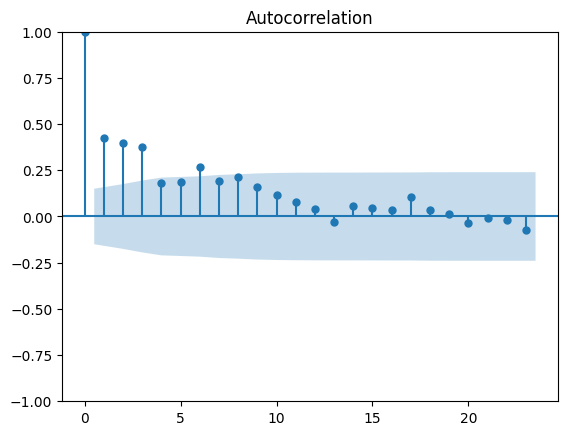

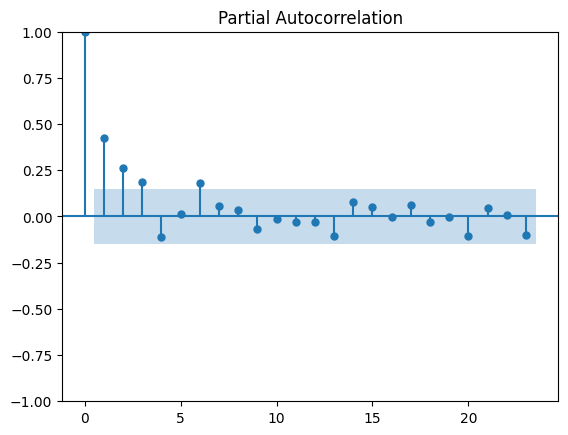

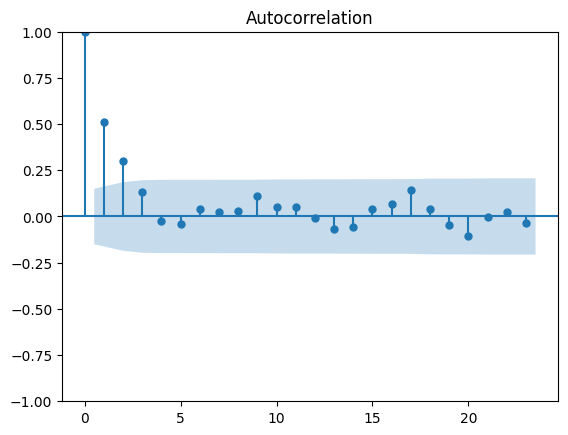

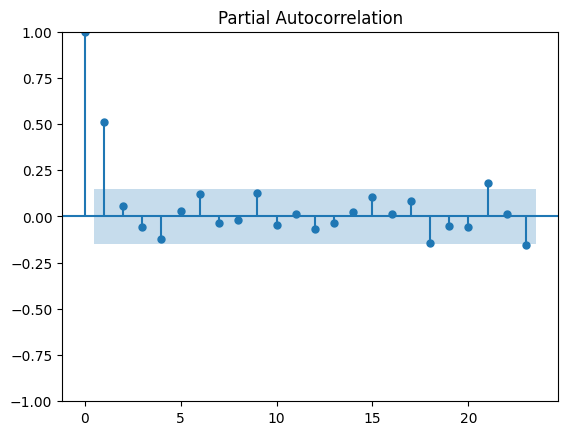

C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecas

Min Price Forecast Object: 136    2172.752892
dtype: float64
Max Price Forecast Object: 136    2389.712601
dtype: float64


C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


TypeError: unsupported format string passed to Series.__format__

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split

# Load the dataset
df = pd.read_excel('bajra.xlsx')

# Convert 'Price Date' to datetime format
df['Price Date'] = pd.to_datetime(df['Price Date'])

# Check and handle missing values
df['Min Price (Rs./Quintal)'].fillna(method='ffill', inplace=True)

# Filter data based on user input (district, market, commodity, and date)
def filter_data(district_name, market_name, commodity, price_date):
    filtered_df = df[(df['District Name'] == district_name) & 
                     (df['Market Name'] == market_name) & 
                     (df['Commodity'] == commodity)]
    filtered_df = filtered_df[filtered_df['Price Date'] <= pd.to_datetime(price_date)]
    return filtered_df

# Get user input
district_name = 'Agra'
market_name = 'Agra'
commodity = 'Bajra(Pearl Millet/Cumbu)'
price_date = '2025-01-01'

# Filter the dataset based on the user inputs
filtered_data = filter_data(district_name, market_name, commodity, price_date)

# Check if there is enough data for the ARIMA model
if len(filtered_data) < 10:
    print("Insufficient data for ARIMA modeling.")
else:
    # Set 'Price Date' as the index
    filtered_data.set_index('Price Date', inplace=True)

    # Use 'Min Price' for forecasting (can be switched to 'Max Price' for prediction)
    price_data = filtered_data['Min Price (Rs./Quintal)']

    # Plot the ACF and PACF plots to determine ARIMA parameters (p, d, q)
    plot_acf(price_data)
    plot_pacf(price_data)
    plt.show()

    # Split data into train and test sets
    train_data, test_data = train_test_split(price_data, test_size=0.2, shuffle=False)

    # Train ARIMA model (example parameters p=1, d=1, q=1, but should be optimized)
    model = ARIMA(train_data, order=(1,1,1))
    model_fit = model.fit()

    # Forecast the price for the entered date
    forecast_steps = 1  # We want to predict only for the next date
    forecast = model_fit.forecast(steps=forecast_steps)

    # Print the forecast object to understand its structure
    print("Forecast Object:", forecast)

    # Extract and display the forecasted value
    forecast_value = forecast[0] if isinstance(forecast, np.ndarray) else forecast

    # Display the forecasted value for the entered date
    forecast_date = pd.to_datetime(price_date) + pd.Timedelta(days=1)
    print(f"Predicted 'Min Price' for {forecast_date}: {forecast_value.iloc[0]:.2f} Rs./Quintal" 
          if isinstance(forecast_value, pd.Series) else f"Predicted 'Min Price' for {forecast_date}: {forecast_value:.2f} Rs./Quintal")

    # You can also plot the historical data and the forecast
    plt.figure(figsize=(10, 6))
    plt.plot(train_data, label='Train Data')
    plt.plot(test_data, label='Test Data')
    plt.plot(forecast_date, forecast_value, 'ro', label='Forecast')
    plt.legend()
    plt.show()


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

# Load the dataset
file_path = "bajra.xlsx"  # Replace with your dataset path
data = pd.read_excel(file_path)

# Convert Price Date to datetime and create temporal features
data['Price Date'] = pd.to_datetime(data['Price Date'])
data['Days Since Start'] = (data['Price Date'] - data['Price Date'].min()).dt.days
data['Month'] = data['Price Date'].dt.month
data['Quarter'] = data['Price Date'].dt.quarter

# Encode categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity']:
    label_encoders[col] = LabelEncoder()
    data[col] = label_encoders[col].fit_transform(data[col])

# Selecting features and target variables
features = data[['District Name', 'Market Name', 'Commodity', 'Days Since Start', 'Month', 'Quarter']]
target_min_price = data['Min Price (Rs./Quintal)']
target_max_price = data['Max Price (Rs./Quintal)']

# Split the dataset into training and testing sets
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Build SVM models for Min Price and Max Price using SVR (Support Vector Regression)
min_price_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
max_price_model = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))

# Train the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Make predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluate the models
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Min Price Model R^2:", r2_score(y_min_test, min_price_pred))

print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))
print("Max Price Model R^2:", r2_score(y_max_test, max_price_pred))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Adding it temporarily.")
            encoder.classes_ = np.append(encoder.classes_, value)
            return encoder.transform([value])[0]

    # Prepare input data
    price_date = pd.to_datetime(price_date)
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Days Since Start': [(price_date - data['Price Date'].min()).days],
        'Month': [price_date.month],
        'Quarter': [price_date.quarter]
    })
    
    # Make predictions
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage
district_name = "Agra"  # Replace with actual value
market_name = "Agra"  # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"  # Replace with actual value
price_date = "2027-12-12"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


Min Price Model RMSE: 301.4982863258422
Min Price Model R^2: 0.1684546363260342
Max Price Model RMSE: 456.82464197678667
Max Price Model R^2: 0.07410279600364
Predicted Min Price: 2462.577607046468
Predicted Max Price: 2334.877292734673


In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# List of Excel files
file_names = [
    "bajra.xlsx", "barley.xlsx", "black gram.xlsx", "chilli red.xlsx", "copra.xlsx", 
    "gram_raw.xlsx", "green gram.xlsx", "groundnut.xlsx", "jowar.xlsx", "lentil.xlsx", 
    "maize.xlsx", "mustard.xlsx", "niger seed.xlsx", "onion.xlsx", "paddy.xlsx"]
'''    "pegeonn pea.xlsx", "potato.xlsx", "ragi.xlsx", "safflower.xlsx", "sesamum.xlsx", 
    "soyabean.xlsx", "sugarcane.xlsx", "sunflower.xlsx", "tomato.xlsx", "wheat1.xlsx"
]'''

# Initialize an empty list to store dataframes
dataframes = []
i=0
# Load all datasets into a list of dataframes
for file_name in file_names:
    data = pd.read_excel(file_name)
    dataframes.append(data)
    print(i)
    i+=1

# Assuming the structure of the datasets is similar and they all have 'District Name', 'Market Name', 
# 'Commodity', 'Price Date', 'Min Price (Rs./Quintal)', and 'Max Price (Rs./Quintal)'

# Merge all dataframes into a single dataframe
combined_data = pd.concat(dataframes, ignore_index=True)

# Feature encoding for categorical variables
label_encoders = {}
for col in ['District Name', 'Market Name', 'Commodity', 'Price Date']:
    label_encoders[col] = LabelEncoder()
    combined_data[col] = label_encoders[col].fit_transform(combined_data[col])

# Selecting features and target variables
features = combined_data[['District Name', 'Market Name', 'Commodity', 'Price Date']]
target_min_price = combined_data['Min Price (Rs./Quintal)']
target_max_price = combined_data['Max Price (Rs./Quintal)']

# Splitting the dataset
X_train, X_test, y_min_train, y_min_test, y_max_train, y_max_test = train_test_split(
    features, target_min_price, target_max_price, test_size=0.2, random_state=42
)

# Building the Random Forest models
min_price_model = RandomForestRegressor(n_estimators=100, random_state=42)
max_price_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the models
min_price_model.fit(X_train, y_min_train)
max_price_model.fit(X_train, y_max_train)

# Predictions
min_price_pred = min_price_model.predict(X_test)
max_price_pred = max_price_model.predict(X_test)

# Evaluation
print("Min Price Model RMSE:", mean_squared_error(y_min_test, min_price_pred, squared=False))
print("Max Price Model RMSE:", mean_squared_error(y_max_test, max_price_pred, squared=False))

# Function for prediction
def predict_prices(district_name, market_name, commodity, price_date):
    def safe_encode(value, encoder):
        if value in encoder.classes_:
            return encoder.transform([value])[0]
        else:
            print(f"Warning: {value} is unseen. Defaulting to first class.")
            return encoder.transform([encoder.classes_[0]])[0]
    
    input_data = pd.DataFrame({
        'District Name': [safe_encode(district_name, label_encoders['District Name'])],
        'Market Name': [safe_encode(market_name, label_encoders['Market Name'])],
        'Commodity': [safe_encode(commodity, label_encoders['Commodity'])],
        'Price Date': [safe_encode(price_date, label_encoders['Price Date'])],
    })
    min_price = min_price_model.predict(input_data)[0]
    max_price = max_price_model.predict(input_data)[0]
    return min_price, max_price

# Example usage for prediction
district_name = "Agra"  # Replace with actual value
market_name = "Agra"     # Replace with actual value
commodity = "Bajra(Pearl Millet/Cumbu)"    # Replace with actual value
price_date = "2025-01-01"  # Replace with actual value

min_price, max_price = predict_prices(district_name, market_name, commodity, price_date)
print(f"Predicted Min Price: {min_price}")
print(f"Predicted Max Price: {max_price}")


0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
Min Price Model RMSE: 1075.5734927435806
Max Price Model RMSE: 1295.1975032277226


C:\Users\moksh\AppData\Local\Temp\ipykernel_17628\2222622668.py:67: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if value in encoder.classes_:


Predicted Min Price: 2172.1
Predicted Max Price: 2385.0


Predicted Minimum Price: 2298.95
Predicted Maximum Price: 2537.25
Predicted Modal Price: 2480.6


C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
C:\Users\moksh\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


NameError: name 'load_label_encoders' is not defined